# 2.3.2 k-最近傍法
k-最近傍法(knn)アルゴリズムは、最も単純な学習アルゴリズムであると言われる。

## 2.3.2.1 k-最近傍法によるクラス分類
一番単純な場合には、k-NNアルゴリズムは、1つの近傍点、つまり訓練データに含まれる点の中で予測したいデータポイントに最も近いものだけを見る。


In [31]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
# vscode で jupyter notebookを使用したとき図の背景色をデフォルトの白にする。
import matplotlib as mpl
% matplotlib inline

mpl.style.use('default')

UsageError: Line magic function `%` not found.


/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
X.shape:(26, 2)


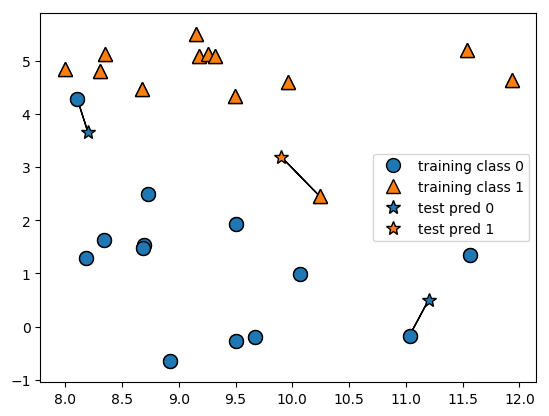

In [32]:
# データセットの生成
X,y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:,1], y)
print('X.shape:{}'.format(X.shape))
# ★が新しいデータポイントで訓練データに最も近いもののラベルがつけられている。
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


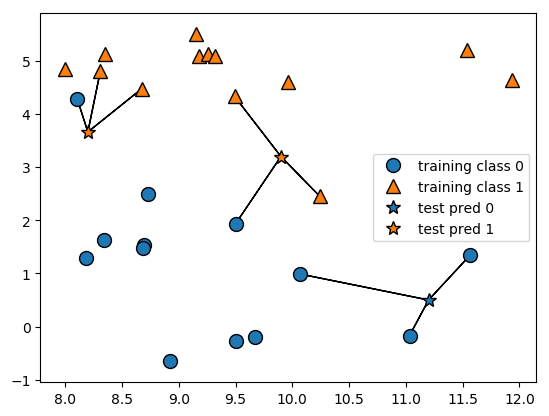

In [33]:
# 訓練データに最も近い3つの点から投票でラベルを決めている。
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [34]:
# scikit-learnを用いてk-最近傍法アルゴリズムが適用できるか示す。
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# 訓練セット, テストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
# k = 3 の k-NN
clf = KNeighborsClassifier(n_neighbors=3)
# 訓練を行う
clf.fit(X_train, y_train)
print('Test set Predictions:{}'.format(clf.predict(X_test)))
# テストセットに対する精度
print('Test set accuracy:{:.2f}'.format(clf.score(X_test, y_test)))

Test set Predictions:[1 0 1 0 1 0 0]
Test set accuracy:0.86
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


## 2.3.2.2 KNeighborsClassifierの解析
2次元のデータセットについては、xy平面のすべての点について、予測結果を表示することができる。

平面をそこに点があったとしたら分類されていたであろうクラスに従って色付けする。

⇒**決定境界(decision boundary)**

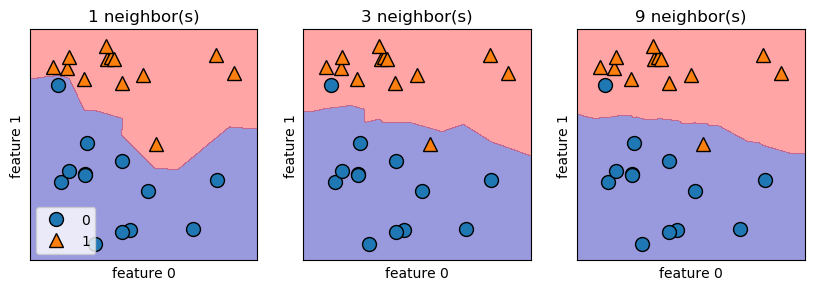

In [35]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

最近傍点が少ない場合は複雑度の高いモデルに対応し、最近傍点が多い場合は複雑度の低いモデルに対応する。


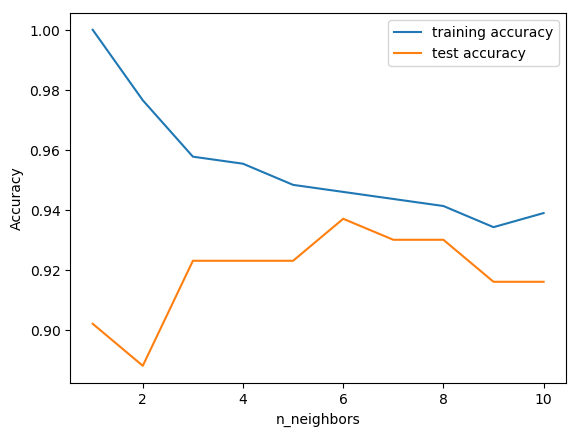

In [36]:
# 乳癌データセットを使用して汎化性能を確認する。
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す。
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


## 2.3.2.3 k-近傍回帰

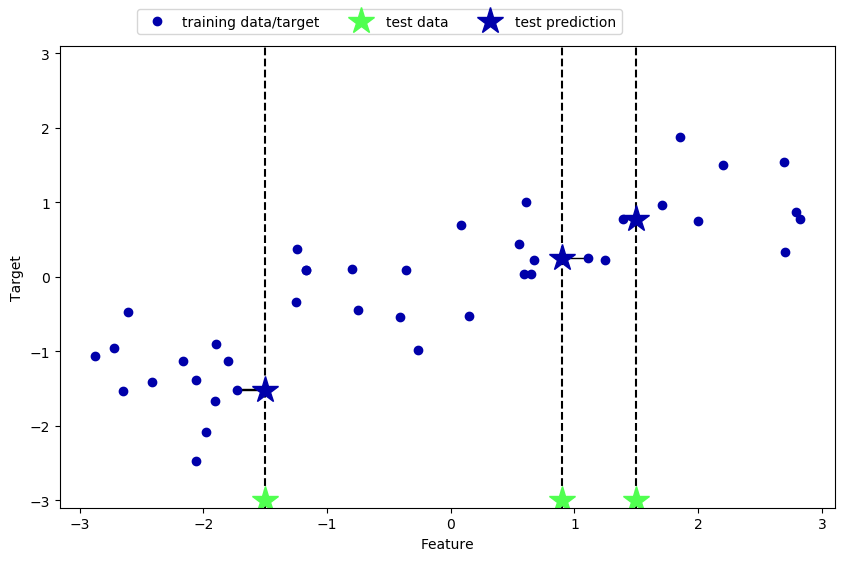

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

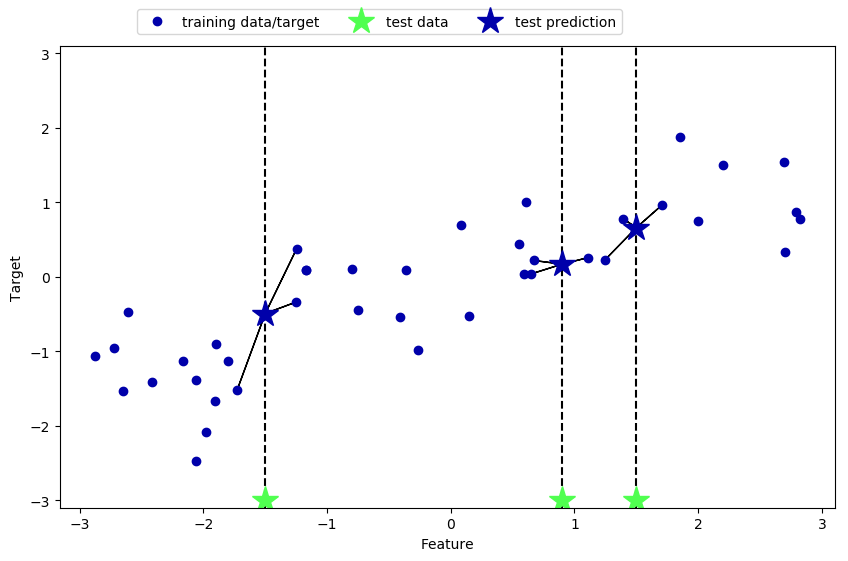

In [38]:
# 最近傍点の平均を用いる。
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
# scikit-learn によるk-近傍回帰の実装
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる。
reg.fit(X_train, y_train)
print('Test set predictions:\n{}'.format(reg.predict(X_test)))
# R^2スコア：決定係数, 0~1の値をとり1は完全な予測に対応し、0は訓練セットのレスポンス値(y_train)の平均を返すだけに対応する。
print('Test set R^2:{:.2f}'.format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:0.83


## 2.3.2.4 KNeighborsRegressorの解析
1次元のデータセットに対して、すべての値に対応する予測値がどのようになるか見てみる。

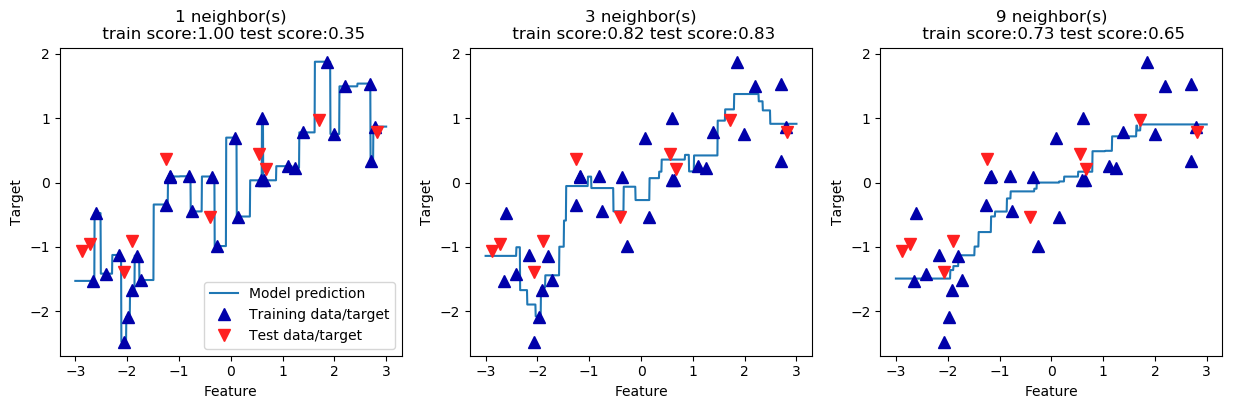

In [40]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
# -3から3までの間に1,000点のデータポイントを作る。
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # 1,3,9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)
    ))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model prediction', 'Training data/target', 'Test data/target'], loc="best")

## 2.3.2.5 利点と欠点とパラメータ
理論的には、KNeighbors分類器には**近傍点の数**と**データポイント間の距離測度**が重要である。

デフォルトではユークリッド距離を用いている。

データの前処理が重要なアルゴリズムである。

利点：アルゴリズムの理解のしやすさ

欠点：多数の特徴量を扱うと処理速度が遅くなる。ほとんどの特徴量が0となるような疎なデータセットでは特に相性が悪い